In [1]:
import pandas as pd
import tensorflow as tf 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

df = pd.read_csv('data/final_project(5).csv')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [2]:
df['y'].value_counts()

0    95803
1    64197
Name: y, dtype: int64

array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>],
       [<AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21

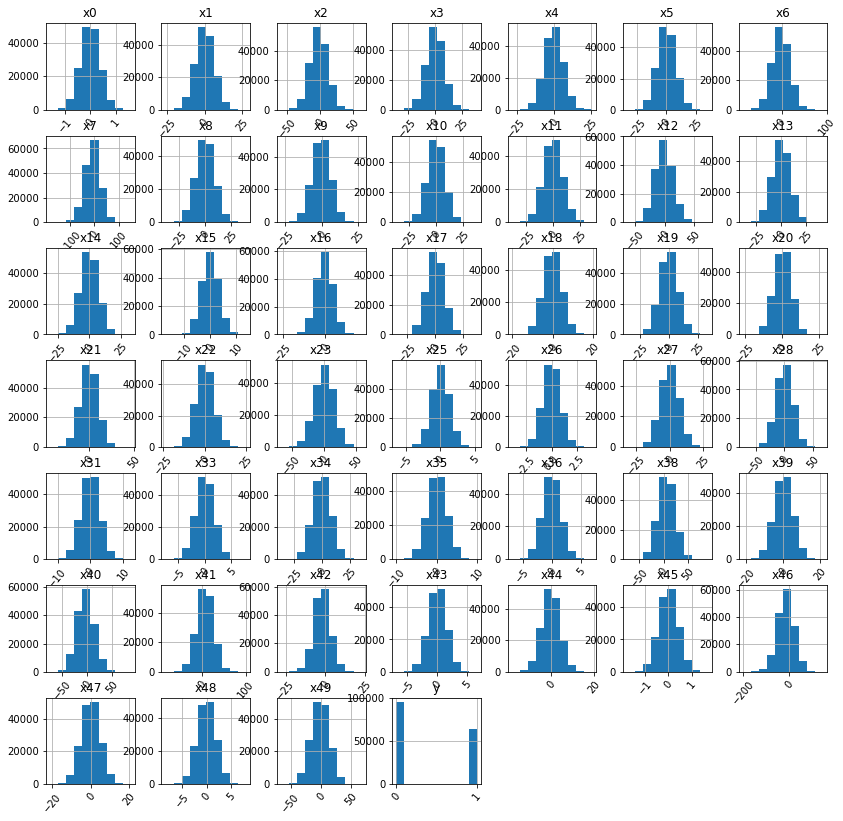

In [3]:
df.hist(figsize=(14,14), xrot=50)

In [4]:
cat_with_target = df.select_dtypes(include=['object', 'int64']).columns.tolist()
df[cat_with_target].sample(10)

,x24,x29,x30,x32,x37,y
33978,asia,Jun,wednesday,0.01%,$-346.79,0
20408,asia,Apr,wednesday,0.0%,$1213.4,0
111404,asia,sept.,thurday,-0.0%,$-588.63,1
54707,euorpe,July,wednesday,-0.01%,$995.69,0
11513,euorpe,Aug,wednesday,-0.01%,$1729.93,0
76872,asia,Apr,wednesday,-0.0%,$1024.45,1
3288,asia,Jun,wednesday,0.01%,$-113.74,0
17819,asia,Apr,wednesday,0.01%,$-1523.35,1
85998,asia,sept.,wednesday,-0.0%,$-565.72,0
143134,asia,Jun,wednesday,0.0%,$1310.31,0


In [5]:
df['x24'].value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [6]:
df['x29'].value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [7]:
df['x30'].value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

## Note, going to make x32 item enum/categorical, see below

In [8]:
df['x32'].value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df['x24'] = df['x24'].astype('category')
df['x29'] = df['x29'].astype('category')
df['x30'] = df['x30'].astype('category')

df['x32'] = [float(x.replace('%','')) for x in df['x32']]
df['x32'] = df['x32'].astype('category')

df['x37'] = [float(x.replace('$','')) for x in df['x37']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      158392 non-null  float64 
 1   x1      158392 non-null  float64 
 2   x2      158392 non-null  float64 
 3   x3      158392 non-null  float64 
 4   x4      158392 non-null  float64 
 5   x5      158392 non-null  float64 
 6   x6      158392 non-null  float64 
 7   x7      158392 non-null  float64 
 8   x8      158392 non-null  float64 
 9   x9      158392 non-null  float64 
 10  x10     158392 non-null  float64 
 11  x11     158392 non-null  float64 
 12  x12     158392 non-null  float64 
 13  x13     158392 non-null  float64 
 14  x14     158392 non-null  float64 
 15  x15     158392 non-null  float64 
 16  x16     158392 non-null  float64 
 17  x17     158392 non-null  float64 
 18  x18     158392 non-null  float64 
 19  x19     158392 non-null  float64 
 20  x20     158392 non-null  f

In [10]:
df['x32'].value_counts()

0.0      63780
0.01     40367
-0.01    33771
-0.02     9812
0.02      7911
-0.03     1709
0.03       845
-0.04      136
0.04        54
-0.05        6
0.05         1
Name: x32, dtype: int64

In [11]:
categorical_features = ['x24', 'x29', 'x30', 'x32']

cat_with_target = ['x24', 'x29', 'x30', 'x32', 'y']

numeric_features = [x for x in df.columns.values.tolist() if x not in cat_with_target]

numeric_features

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x25',
 'x26',
 'x27',
 'x28',
 'x31',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49']

In [12]:
dum_df = pd.get_dummies(df, columns=['x24', 'x29', 'x30', 'x32'], prefix=['x24_type', 'x29_type', 'x30_type', 'x32_type'])

dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   x0                  158392 non-null  float64
 1   x1                  158392 non-null  float64
 2   x2                  158392 non-null  float64
 3   x3                  158392 non-null  float64
 4   x4                  158392 non-null  float64
 5   x5                  158392 non-null  float64
 6   x6                  158392 non-null  float64
 7   x7                  158392 non-null  float64
 8   x8                  158392 non-null  float64
 9   x9                  158392 non-null  float64
 10  x10                 158392 non-null  float64
 11  x11                 158392 non-null  float64
 12  x12                 158392 non-null  float64
 13  x13                 158392 non-null  float64
 14  x14                 158392 non-null  float64
 15  x15                 158392 non-nul

## using parameters from AutoML in H2O Flow

In [13]:
from sklearn.ensemble import GradientBoostingClassifier 

# One-hot encoding of categorical variables
dum_df = pd.get_dummies(df, columns=['x24', 'x29', 'x30', 'x32'], prefix=['x24_type', 'x29_type', 'x30_type', 'x32_type'])

#dum_df = dum_df.sample(frac=.01)

X = dum_df.loc[:, dum_df.columns != 'y']

y = dum_df['y']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

model = GradientBoostingClassifier(n_estimators=145, max_depth=14, min_samples_leaf=30)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.948767322200827


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[18276,   694],
       [  929, 11780]], dtype=int64)

# Ignore below for now, Dan Testing other stuff

## Look at using custom scoring, lightgbm, using H2o

In [3]:
import h2o
from h2o.automl import H2OAutoML


try:
    h2o.cluster().shutdown()
    h2o.init()
except:
    h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM 18.9 (build 11.0.5+10-LTS, mixed mode)
  Starting server from C:\Users\dancr\miniconda3\envs\NLP\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\dancr\AppData\Local\Temp\tmpi7a0en51
  JVM stdout: C:\Users\dancr\AppData\Local\Temp\tmpi7a0en51\h2o_dancr_started_from_python.out
  JVM stderr: C:\Users\dancr\AppData\Local\Temp\tmpi7a0en51\h2o_dancr_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.6
H2O_cluster_version_age:,2 months and 29 days
H2O_cluster_name:,H2O_from_python_dancr_sbigsw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.95 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [2]:
h2o.cluster().shutdown()

H2O session _sid_9de3 closed.


In [ ]:
def my_loss(y_true, y_pred, **kwargs):
    residual = (y_true - y_pred).astype("float")
    cost = np.where(residual > 0, 100, 25)
    return cost.sum()


my_scorer = make_scorer(my_loss, greater_is_better=False)

In [66]:
def custom_asymmetric_train(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual<0, -25, -100)
    hess = np.where(residual<0, -25, -100)
    return grad, hess

def custom_asymmetric_valid(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual**2)*10.0, residual**2) 
    return "custom_asymmetric_eval", np.mean(loss), False

In [69]:
import lightgbm

gbm = lightgbm.LGBMClassifier(n_estimators=145, max_depth=14, min_samples_leaf=30)


# updating objective function to custom
# default is "regression"
# also adding metrics to check different scores
gbm.set_params(**{'objective': custom_asymmetric_train}, metrics = ["mse", 'mae'])

# fitting model 
gbm.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=custom_asymmetric_valid
)

y_pred = gbm.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[1]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[2]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[3]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[4]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[5]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[6]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[7]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[8]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[9]	valid_0's l2: 0.401181	valid_0's l1: 0.401181	valid_0's custom_asymmetric_eval: 0.401181
[10]	valid_0'

C:\Users\dancr\miniconda3\envs\NLP\lib\site-packages\lightgbm\sklearn.py:999: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


In [68]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])